In [1]:
# set environment and import packages
import os
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings("ignore")

os.chdir('/Users/xiaodanxu/Documents/SynthFirm.nosync')

In [2]:
CFS_file = 'RawData/CFS/CFS2017_national_export-only.csv'
CFS_export_df = read_csv(CFS_file)
print(CFS_export_df.columns)
CFS_export_df.head(5)

Index(['SHIPMT_ID', 'ORIG_STATE', 'ORIG_MA', 'ORIG_CFS_AREA', 'DEST_STATE',
       'DEST_MA', 'DEST_CFS_AREA', 'NAICS', 'QUARTER', 'SCTG', 'MODE',
       'SHIPMT_VALUE', 'SHIPMT_WGHT', 'SHIPMT_DIST_GC', 'SHIPMT_DIST_ROUTED',
       'TEMP_CNTL_YN', 'EXPORT_YN', 'EXPORT_CNTRY', 'HAZMAT', 'WGT_FACTOR',
       'mode_agg5', 'mode_agg3', 'mode_decode', 'bulk', 'fuel_fert',
       'interm_food', 'mfr_goods', 'other', 'commodity', 'naics2',
       'naics_name', 'wholesale', 'mfring', 'mining', 'retail', 'info',
       'management', 'transwarehouse', 'wght_bin1', 'SHIPMT_WGHT_TON',
       'value_density', 'SHIPMT_DIST'],
      dtype='object')


,SHIPMT_ID,ORIG_STATE,ORIG_MA,ORIG_CFS_AREA,DEST_STATE,DEST_MA,DEST_CFS_AREA,NAICS,QUARTER,SCTG,...,mfring,mining,retail,info,management,transwarehouse,wght_bin1,SHIPMT_WGHT_TON,value_density,SHIPMT_DIST
0,61,4,99999,04-99999,6,348,06-348,334,3,37,...,1,0,0,0,0,0,1,0.0005,212.000000,345
1,65,9,408,09-408,36,408,36-408,334,3,38,...,1,0,0,0,0,0,1,0.0295,249.118644,55
2,70,9,408,09-408,36,408,36-408,335,3,34,...,1,0,0,0,0,0,1,0.0025,150.600000,105
3,84,53,99999,53-99999,36,99999,36-99999,333,4,43,...,1,0,0,0,0,0,1,0.0005,603.000000,2384
4,113,9,408,09-408,36,408,36-408,4238,3,34,...,0,0,0,0,0,0,2,0.6185,7.554568,96


In [12]:
print(CFS_export_df.EXPORT_CNTRY.unique())

['E' 'A' 'C' 'M' 'S']


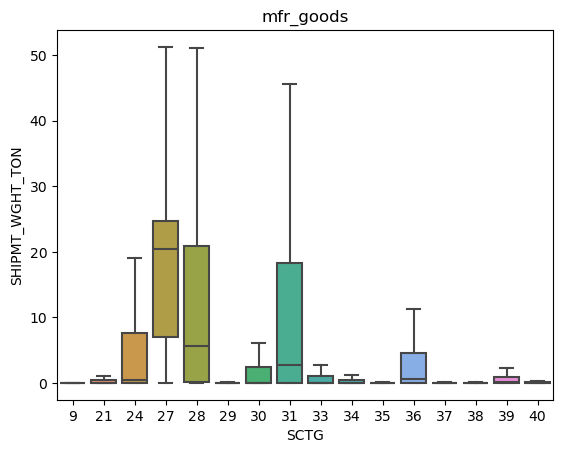

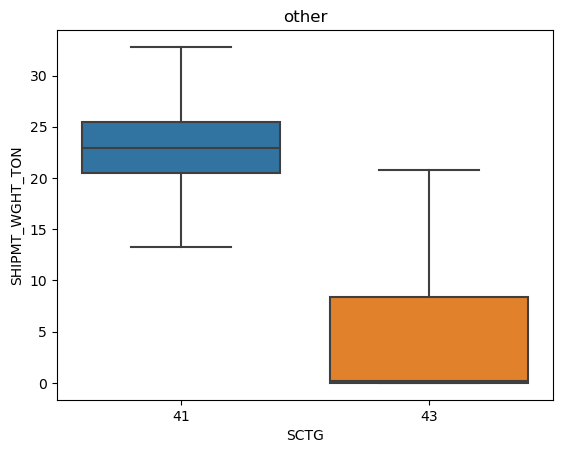

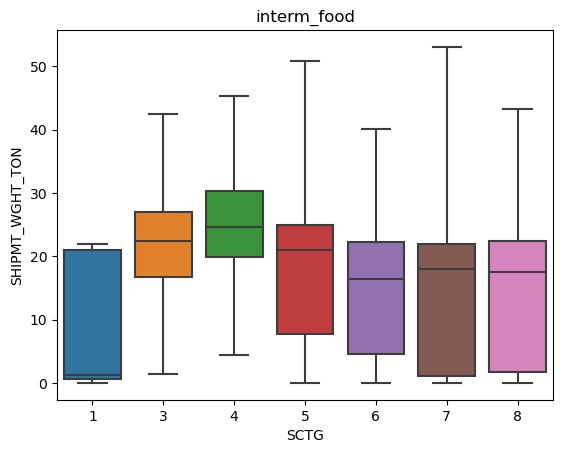

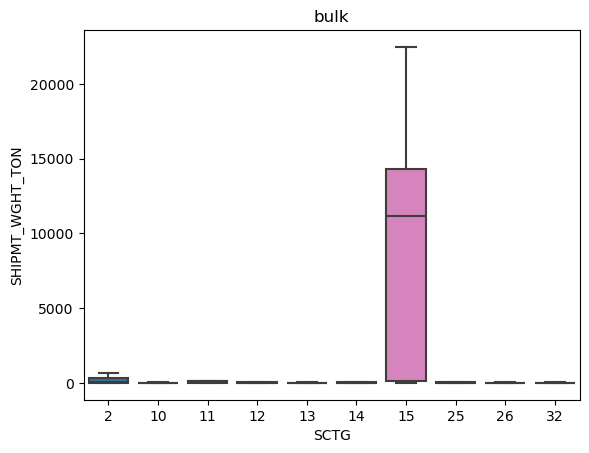

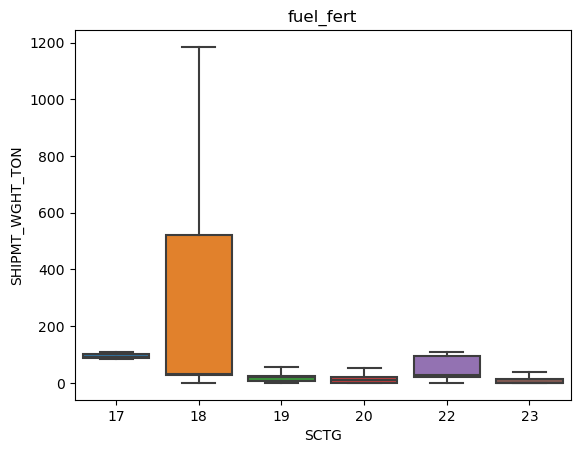

In [9]:
for sctg_group in CFS_export_df.commodity.unique():
    data_to_plot = CFS_export_df.loc[CFS_export_df['commodity'] == sctg_group]
    sns.boxplot(x="SCTG", y="SHIPMT_WGHT_TON", 
            data= data_to_plot,
            showfliers=False)
    plt.title(sctg_group)
    plt.show()

CFS export sample size:
211402


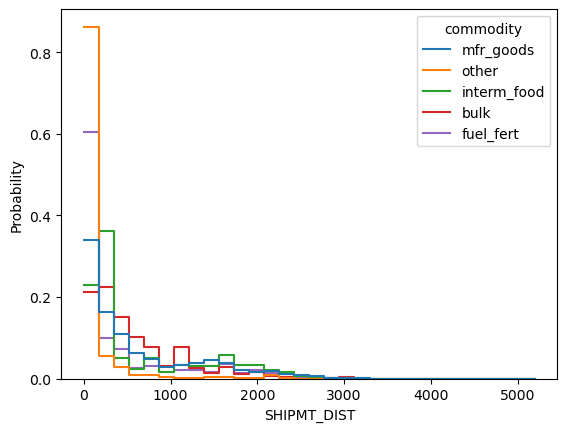

In [17]:
print('CFS export sample size:')
print(len(CFS_export_df))
CFS_export_df.loc[:, 'WGT_TONNES'] = CFS_export_df.loc[:, 'WGT_FACTOR'] * \
CFS_export_df.loc[:, 'SHIPMT_WGHT_TON']
sns.histplot(data = CFS_export_df, x = 'SHIPMT_DIST', bins = 30, 
             common_norm = False, hue = 'commodity', stat = 'probability',
             weights='WGT_TONNES', element = 'step', fill = False)
plt.show()

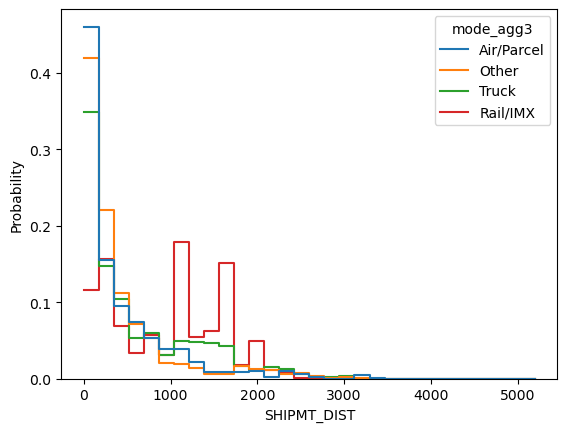

In [18]:
sns.histplot(data = CFS_export_df, x = 'SHIPMT_DIST', bins = 30, 
             common_norm = False, hue = 'mode_agg3', stat = 'probability',
             weights='WGT_TONNES', element = 'step', fill = False)
plt.show()

<Axes: xlabel='WGT_TONNES', ylabel='SCTG_NAME'>

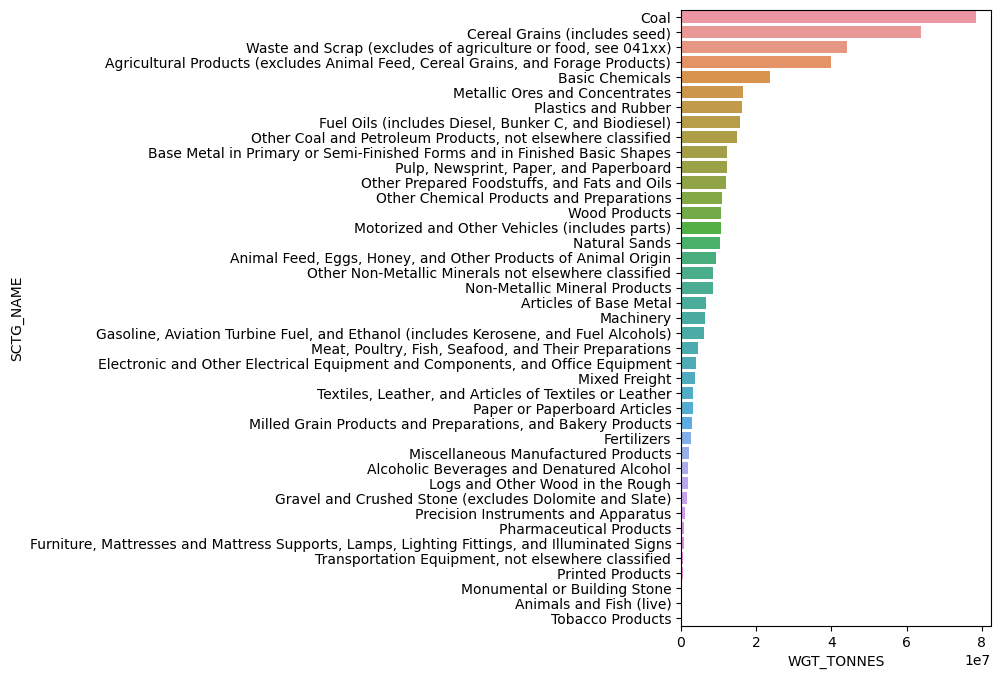

In [22]:
SCTG_lookup_file = 'SynthFirm_parameters/SCTG_Groups_revised.csv'
SCTG_lookup = read_csv(SCTG_lookup_file)
# SCTG_lookup.head(5)
SCTG_lookup = SCTG_lookup[['SCTG_Code', 'Description']]
SCTG_lookup.columns = ['SCTG', 'SCTG_NAME']

CFS_export_by_sctg = CFS_export_df.groupby(['SCTG'])[['WGT_TONNES']].sum()
CFS_export_by_sctg = CFS_export_by_sctg.reset_index()
CFS_export_by_sctg = pd.merge(CFS_export_by_sctg, SCTG_lookup, 
                              on = 'SCTG', how = 'left')
CFS_export_by_sctg = CFS_export_by_sctg.sort_values(by = 'WGT_TONNES',
                                                   ascending = False)
# weighted shipment by commodity
plt.figure(figsize = (4,8))
sns.barplot(x="WGT_TONNES", y="SCTG_NAME", data=CFS_export_by_sctg)

In [15]:
CFS_export_df.groupby('MODE').size()

MODE
3          2
4      53221
5       2397
6       2834
7         54
9          3
10       991
11     48384
14     56298
15       280
16     41369
17      2507
18      2099
20       884
101       79
dtype: int64